<a id='table_of_contents'></a>

1. [Import libraries](#imports)
2. [Import data](#import_data)
3. [Data exploration](#data_exploration)<br>
        3.1 [Sales Data](#Sales_EDA)<br>
        3.2 [Stores Data](#Stores_EDA)<br>
4. [Data cleaning](#data_cleaning)<br>
        4.1 [Sales Data Cleaning](#data_clean1)<br>
        4.2 [Stores Data Cleaning](#data_clean2)<br>
5. [Feature engineering](#feature_engineering)
6. [Data preparation](#data_preparation)<br>
        6.1 [Data Merge](#data_merge)<br>
        6.2 [Encoding Categorical Data](#encoding)<br>
        6.3 [Data Splitting](#split)<br>
        6.4 [Feature Selection](#feature_select)<br>
7. [Model training](#model_training)<br>

# 1. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set(style="darkgrid")
warnings.filterwarnings('ignore')

# 2. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

#### Reading Data from 2 datasets

In [3]:
sales_df = pd.read_csv('Data/Salesdata.csv')


In [4]:
df_store = pd.read_csv('Data/store.csv')
df_store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

# 3. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

## 3.1 Sales Data EDA <a id='Sales_EDA'></a>
[Back to top](#table_of_contents)

In [5]:
sales_df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  31-07-2015   5263        555     1      1            0   
1      2          5  31-07-2015   6064        625     1      1            0   
2      3          5  31-07-2015   8314        821     1      1            0   
3      4          5  31-07-2015  13995       1498     1      1            0   
4      5          5  31-07-2015   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [6]:
sales_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [7]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
print(sales_df.shape)

(1017209, 9)


In [9]:
# checking for Missing values
sales_df.isna().sum().sum()

0

NO missing values in sales dataset

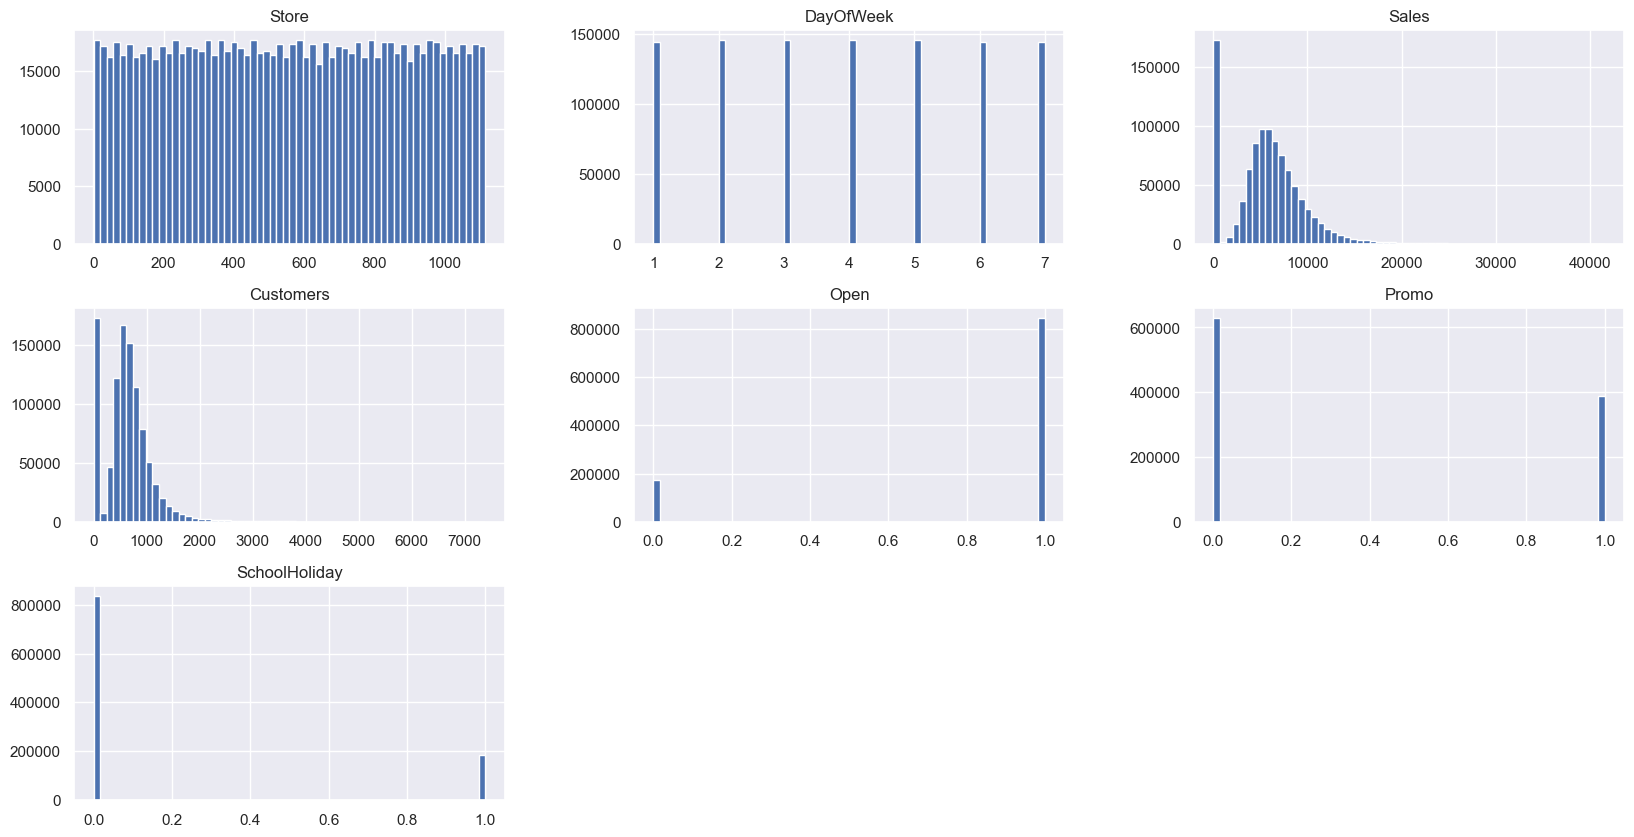

In [10]:
sales_df.hist(figsize=(20, 10), bins = 60)
plt.show()

# Sales

In [11]:
sales_df['Sales'].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

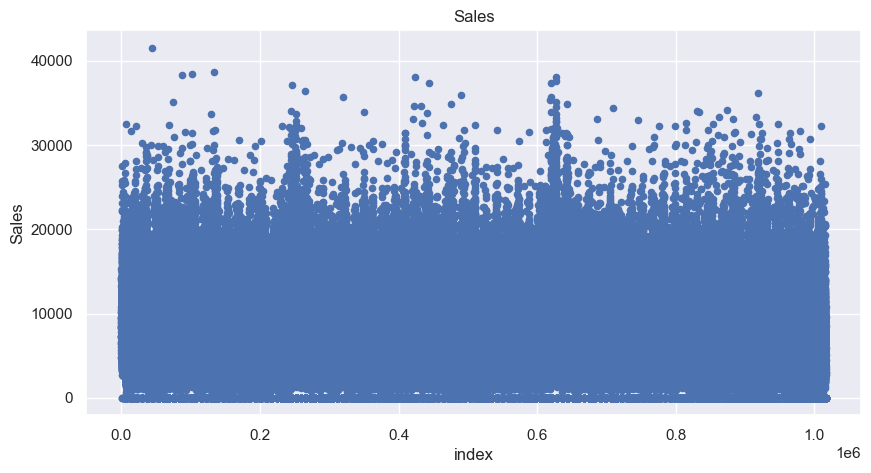

In [12]:
sales_df.reset_index().plot(kind='scatter', y='Sales', x='index', figsize=(10, 5))
plt.title("Sales")
plt.show()

In [13]:
sales_df[sales_df['Sales']<3000].reset_index().plot(kind='scatter', y='Sales', x='index', figsize=(10, 5))
plt.title("Sales less than 3000")
plt.show()

In [14]:
zero_sales = sales_df[sales_df['Sales'] == 0]
print(zero_sales.shape)

(172871, 9)


In [15]:
(zero_sales.shape[0]/sales_df.shape[0])*100

16.994639253093514

Sales_Zeros = 172871

Zeros(%) = 17% of overall sales is zero

# Open

In [16]:
sales_df['Open'].value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

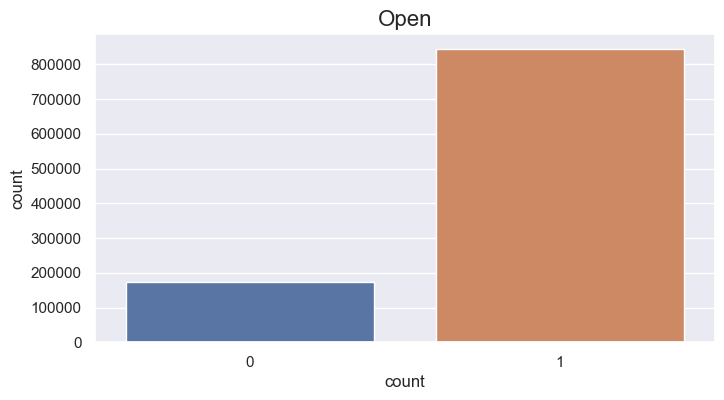

In [17]:
plt.figure(figsize=(8,4))
sns.countplot(data=sales_df, x=sales_df.Open)
plt.title('Open', fontsize=16)
plt.xlabel('count')
plt.show()

In [18]:
sales_df[sales_df['Sales']==0]['Open'].value_counts()

Open
0    172817
1        54
Name: count, dtype: int64

# Customers
[Back to top](#table_of_contents)

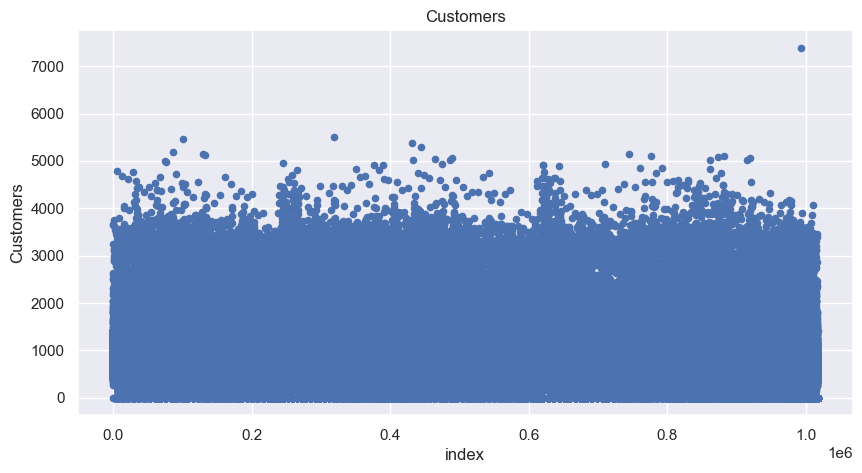

In [19]:
sales_df.reset_index().plot(kind='scatter', y='Customers', x='index', figsize=(10, 5))
plt.title("Customers")
plt.show()

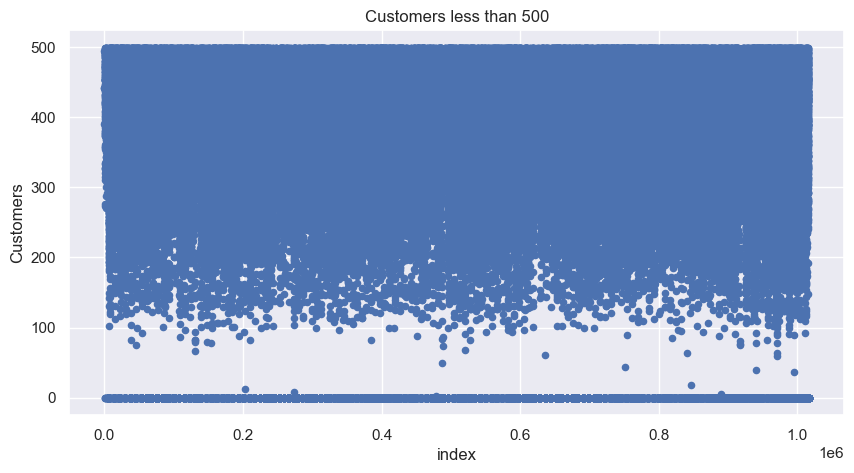

In [20]:
sales_df[sales_df['Customers']<500].reset_index().plot(kind='scatter', y='Customers', x='index', figsize=(10, 5))
plt.title("Customers less than 500")
plt.show()

In [21]:
sales_df[sales_df['Customers'] == 0].shape[0]

172869

In [22]:
sales_df[sales_df['Customers'] == 0]['Open'].value_counts()

Open
0    172817
1        52
Name: count, dtype: int64

[Back to top](#table_of_contents)

# Day Of the week

In [23]:
sales_df['DayOfWeek'].nunique()

7

In [24]:
sales_df['DayOfWeek'].value_counts()

DayOfWeek
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: count, dtype: int64

In [25]:
sales_df[sales_df['Customers'] == 0]['DayOfWeek'].value_counts()

DayOfWeek
7    141137
4     11218
5      7212
1      7173
3      3743
2      1708
6       678
Name: count, dtype: int64

In [26]:
sales_df[sales_df['Sales'] == 0]['DayOfWeek'].value_counts()

DayOfWeek
7    141137
4     11219
5      7212
1      7173
3      3743
2      1709
6       678
Name: count, dtype: int64

In [27]:
sales_df[(sales_df['Open']==0)]['DayOfWeek'].value_counts()

DayOfWeek
7    141137
4     11201
5      7205
1      7170
3      3729
2      1703
6       672
Name: count, dtype: int64

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sales_df[sales_df['Open'] == 0]['DayOfWeek'].hist(bins=60, ax=axes[2])
axes[0].set_title('Open == 0')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Count')

sales_df[sales_df['Customers'] == 0]['DayOfWeek'].hist(bins=60, ax=axes[0])
axes[1].set_title('Customers == 0')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Count')

sales_df[sales_df['Sales'] == 0]['DayOfWeek'].hist(bins=60, ax=axes[1])
axes[2].set_title('Sales == 0')
axes[2].set_xlabel('Day of Week')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

observation

most of the times stores are also closed on sunday.
so the sales drop on 7th day (sunday) 

Attribute DayOfWeek is highly correlated with open 

# Sales over years
[Back to top](#table_of_contents)

In [29]:
sale_timeline = sales_df.copy()

In [30]:
sale_timeline['Date'] = pd.to_datetime(sale_timeline['Date'])
sale_timeline['Year'] = sale_timeline['Date'].dt.year

In [31]:
df_yearly_sales = sale_timeline.groupby('Year')['Sales'].sum().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(df_yearly_sales['Year'], df_yearly_sales['Sales'], marker='o', linestyle='--', color='b')
plt.title('Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(df_yearly_sales['Year'])
plt.show()

# Promo

In [32]:
sales_df['Promo'].value_counts()

Promo
0    629129
1    388080
Name: count, dtype: int64

In [33]:
promo_count = sales_df['Promo'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(promo_count, labels=promo_count.index,
        autopct='%1.1f%%', colors=['#F4CE14', '#E55604'])
plt.title('Promo')
plt.show()

# School Holiday

In [34]:
sales_df['SchoolHoliday'].value_counts()

SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64

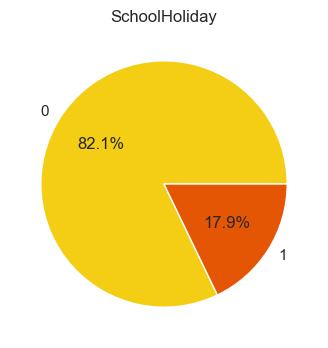

In [35]:
school_holiday_count = sales_df['SchoolHoliday'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(school_holiday_count, labels=school_holiday_count.index,
        autopct='%1.1f%%', colors=['#F4CE14', '#E55604'])
plt.title('SchoolHoliday')
plt.show()

# StateHoliday   

In [36]:
sales_df['StateHoliday'].value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [37]:
sales_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

StateHoliday attribute needs correction as the zero(0) is recorded as both int(0) and str ('0')

In [38]:
sales_df['StateHoliday'] = sales_df['StateHoliday'].replace(0, '0')

In [39]:
sales_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [40]:
sales_df['StateHoliday'].value_counts()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

Observations : 

0 - None - (986159) - 97%

a - public holiday -(20260) - 2%

b - easter holiday - (6690) - 0.65%

c - christmas - (4100) - 0.40 %

overall 3 % of Stateholidays recorded.

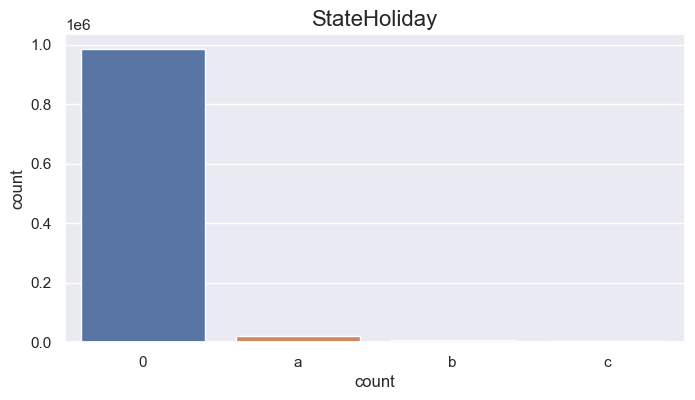

In [41]:
plt.figure(figsize=(8,4))
sns.countplot(data=sales_df, x=sales_df.StateHoliday)
plt.title('StateHoliday', fontsize=16)
plt.xlabel('count')
plt.show()

# Outliers analysis

## Sales

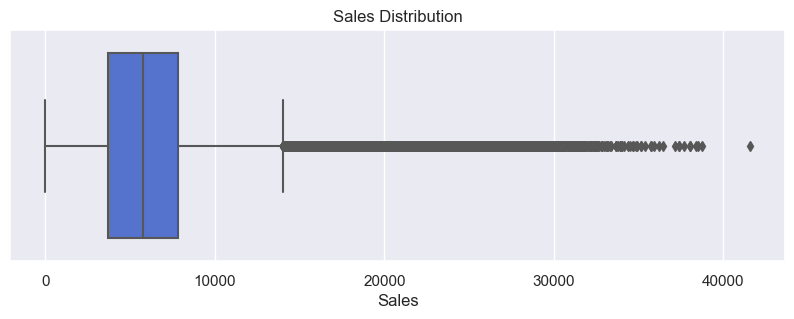

In [42]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=sales_df.Sales, showfliers=True, showbox=True, whis=1.5, color='royalblue')
plt.title('Sales Distribution')
plt.show()

## Customers

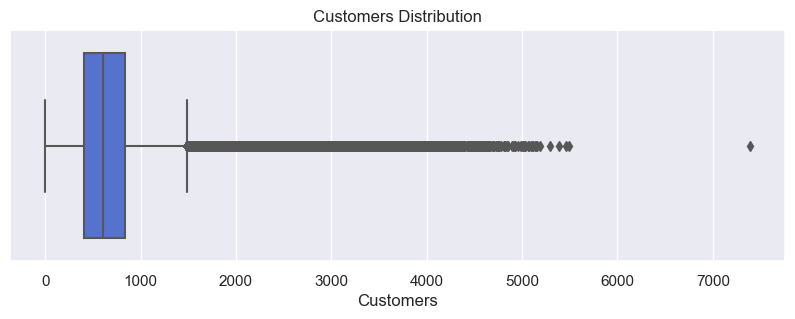

In [43]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=sales_df.Customers, showfliers=True, showbox=True, whis=1.5, color='royalblue')
plt.title('Customers Distribution')
plt.show()

## Skewness analysis

In [44]:
pd.DataFrame.from_dict(dict(
    {
        'Sales':sales_df.Sales.skew(), 
        'Customers':sales_df.Customers.skew()
    }), orient='index', columns=['Skewness'])

Skewness
Sales       0.64146
Customers   1.59865

1. Minimal skewness for Sales attribute as skewness less than 1
2. Customers attribute is highly skewed towards right.

## Correlation of Sales features

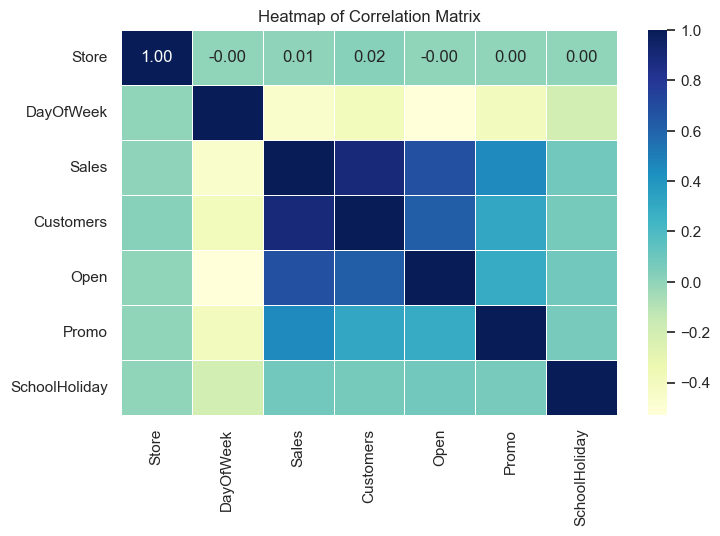

In [45]:
df = sales_df.select_dtypes(include=np.number)
correlation_matrix = df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()

## 3.2 Stores Data EDA <a id='Stores_EDA'></a>
[Back to top](#table_of_contents)

In [46]:
df_store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [47]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [48]:
df_store.isna().sum() # checking for missing values

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

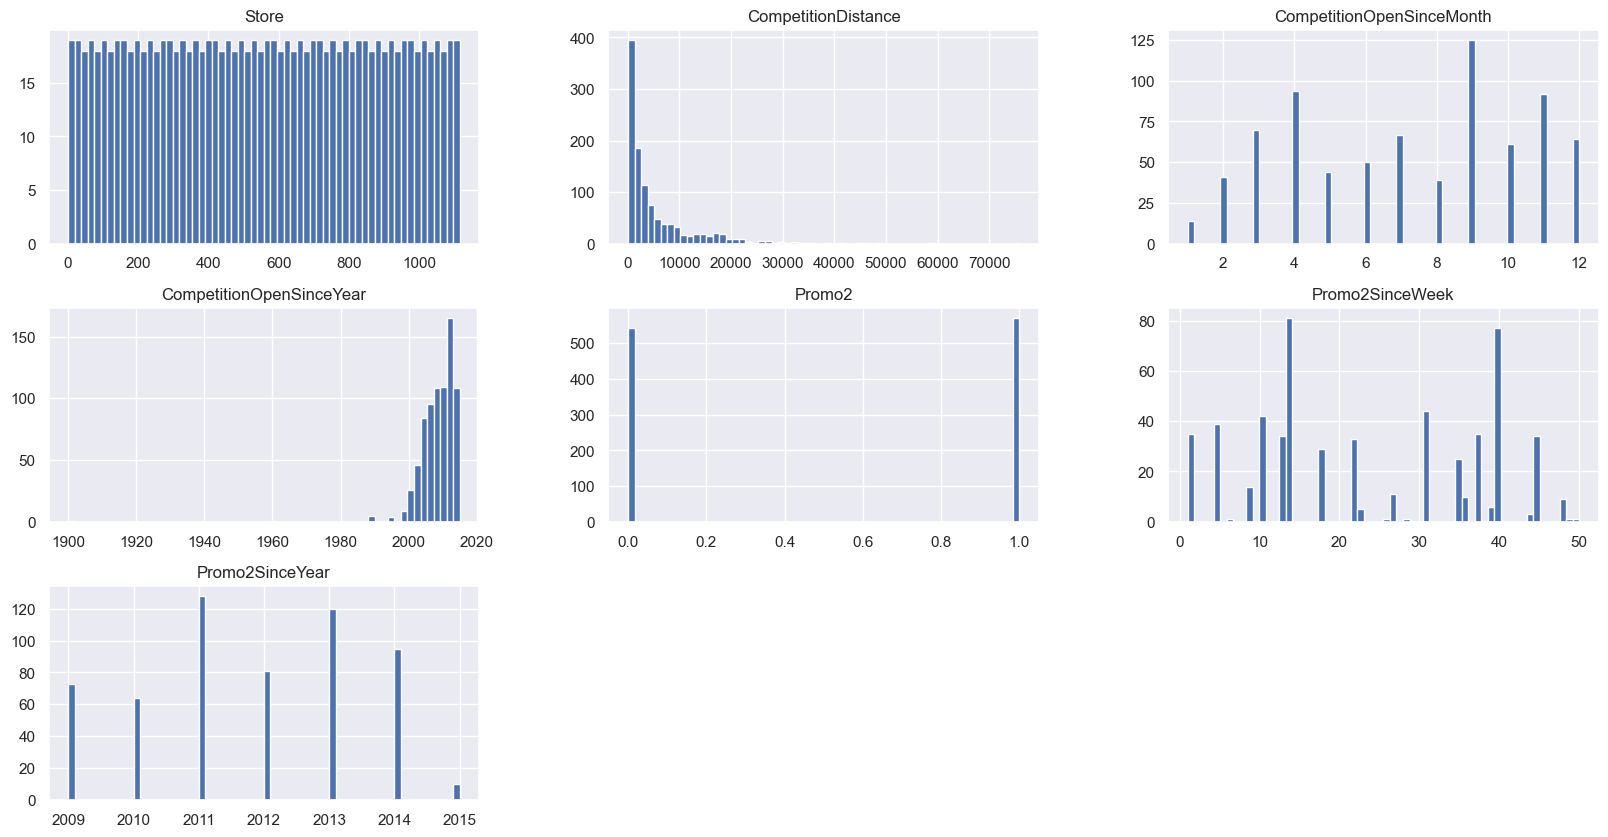

In [49]:
df_store.hist(figsize=(20, 10), bins = 60)
plt.show()

In [50]:
df_store[df_store['Promo2']==0].shape

(544, 10)

In [51]:
df_store[df_store['Promo2']==0].head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   
5      6         a          a                310.0                       12.0   
6      7         a          c              24000.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   
5                    2013.0       0              NaN              NaN   
6                    2013.0       0              NaN              NaN   

  PromoInterval  
0           NaN  
3           NaN  
4           NaN  
5           NaN  
6           NaN

In [52]:
df_store['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

Obervations

1. No data recorded in attributes 'Promo2SinceWeek','Promo2SinceYear' and 'PromoInterval' 
   as the store is not participating in the Promo2 (Promo2 = 0)

2. 31.7% data is missing from attributes CompetitionOpenSinceMonth & CompetitionOpenSinceYear attributes

# StoreType

In [53]:
df_store['StoreType'].value_counts()

StoreType
a    602
d    348
c    148
b     17
Name: count, dtype: int64

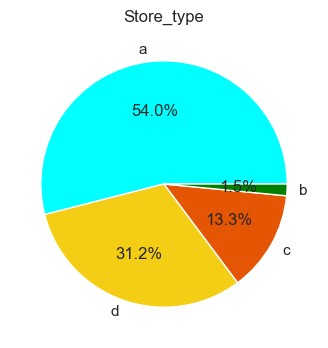

In [54]:
Store_type = df_store['StoreType'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(Store_type, labels=Store_type.index,
        autopct='%1.1f%%', colors=['aqua', '#F4CE14', '#E55604', 'green'])
plt.title('Store_type')
plt.show()

# Assortment

In [55]:
df_store['Assortment'].value_counts()

Assortment
a    593
c    513
b      9
Name: count, dtype: int64

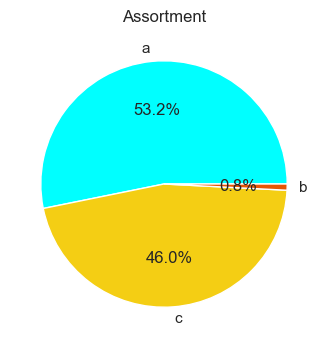

In [56]:
Assortment = df_store['Assortment'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(Assortment, labels=Assortment.index,
        autopct='%1.1f%%', colors=['aqua', '#F4CE14', '#E55604', 'green'])
plt.title('Assortment')
plt.show()

# 4. Data cleaning <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

## 4.1 Sales Data Cleaning <a id ='data_clean1'></a>
[Back to top](#table_of_contents)

In [57]:
df_sales_clean = sales_df.copy()

In [58]:
#checking for missing values
df_sales_clean.isna().sum().sum()

0

### Clearing outliers / extreme values

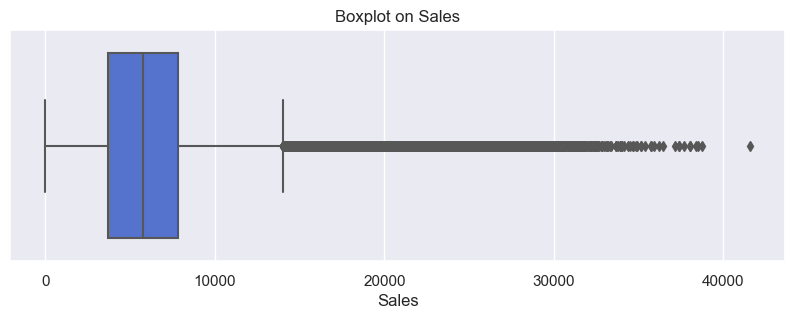

In [59]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_sales_clean.Sales, showfliers=True, showbox=True, whis=1.5, color='royalblue')
plt.title('Boxplot on Sales')
plt.show()

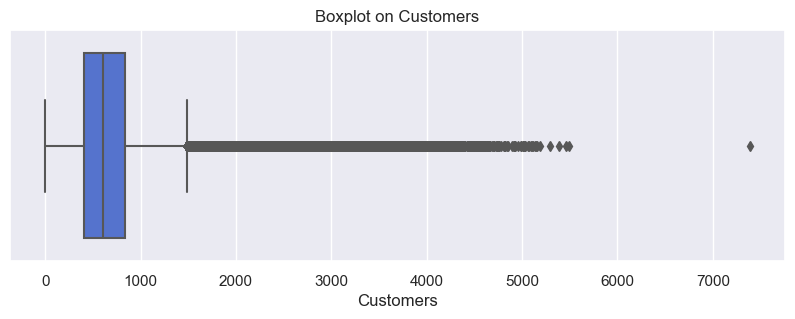

In [60]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_sales_clean.Customers, showfliers=True, showbox=True, whis=1.5, color='royalblue')
plt.title('Boxplot on Customers')
plt.show()

In [61]:
from scipy.stats import zscore
def remove_outliers(col, data):
    outlier_col = col + "_outliers"
    data[outlier_col] = data[col]
    data[outlier_col]= zscore(data[outlier_col])

    condition = (data[outlier_col]>3) | (data[outlier_col]<-3)
    print(data[condition].shape)
    data.drop(data[condition].index, axis = 0, inplace = True)
    data.drop(outlier_col, axis=1, inplace=True)

In [62]:
remove_outliers('Sales', df_sales_clean)

(9731, 10)


In [63]:
remove_outliers('Customers', df_sales_clean)

(10501, 10)


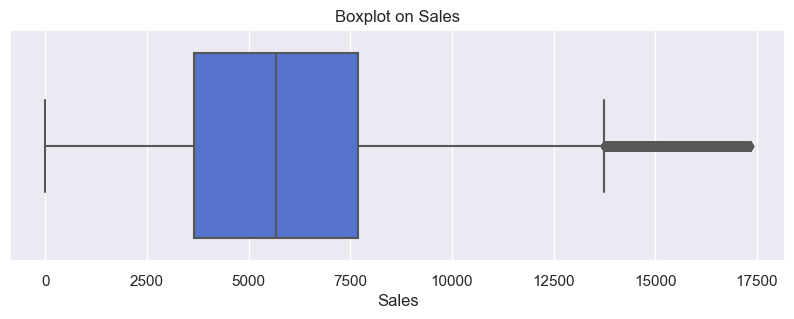

In [64]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_sales_clean.Sales, showfliers=True, showbox=True, whis=1.5, color='royalblue')
plt.title('Boxplot on Sales')
plt.show()

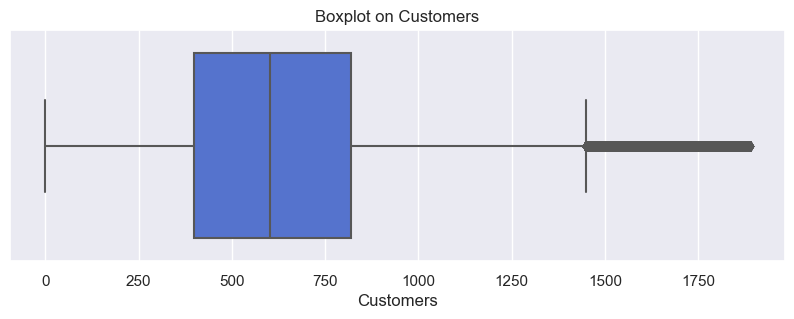

In [65]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_sales_clean.Customers, showfliers=True, showbox=True, whis=1.5, color='royalblue')
plt.title('Boxplot on Customers')
plt.show()

In [66]:
pd.DataFrame.from_dict(dict(
    {
        'Sales':df_sales_clean.Sales.skew(), 
        'Customers':df_sales_clean.Customers.skew()
    }), orient='index', columns=['Skewness'])

Skewness
Sales       0.10212
Customers   0.22518

In [67]:
df_sales_clean = df_sales_clean[df_sales_clean['Sales'] < 15000]
df_sales_clean = df_sales_clean[df_sales_clean['Customers'] < 1500]

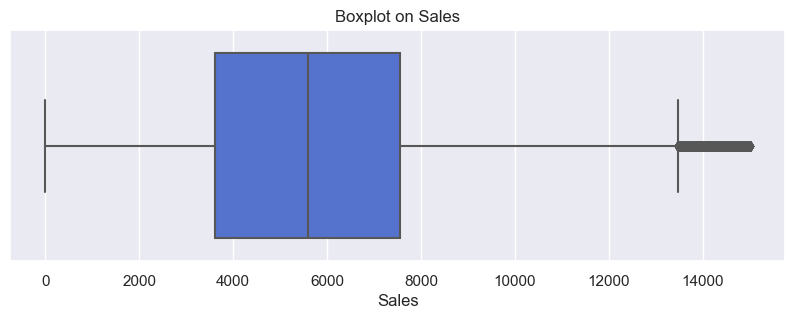

In [68]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_sales_clean.Sales, showfliers=True, showbox=True, whis=1.5, color='royalblue')
plt.title('Boxplot on Sales')
plt.show()

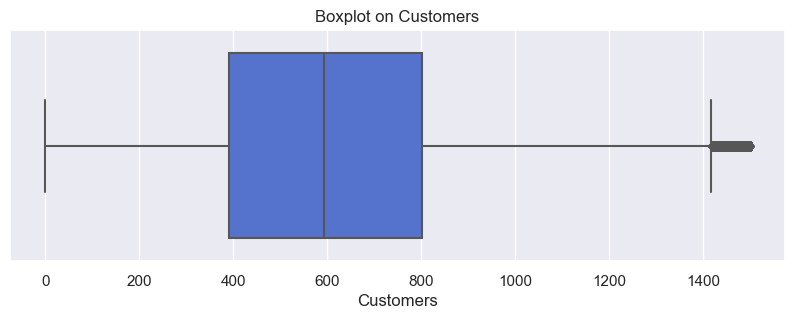

In [69]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_sales_clean.Customers, showfliers=True, showbox=True, whis=1.5, color='royalblue')
plt.title('Boxplot on Customers')
plt.show()

In [70]:
pd.DataFrame.from_dict(dict(
    {
        'Sales':df_sales_clean.Sales.skew(), 
        'Customers':df_sales_clean.Customers.skew()
    }), orient='index', columns=['Skewness'])

Skewness
Sales     -0.059760
Customers -0.065484

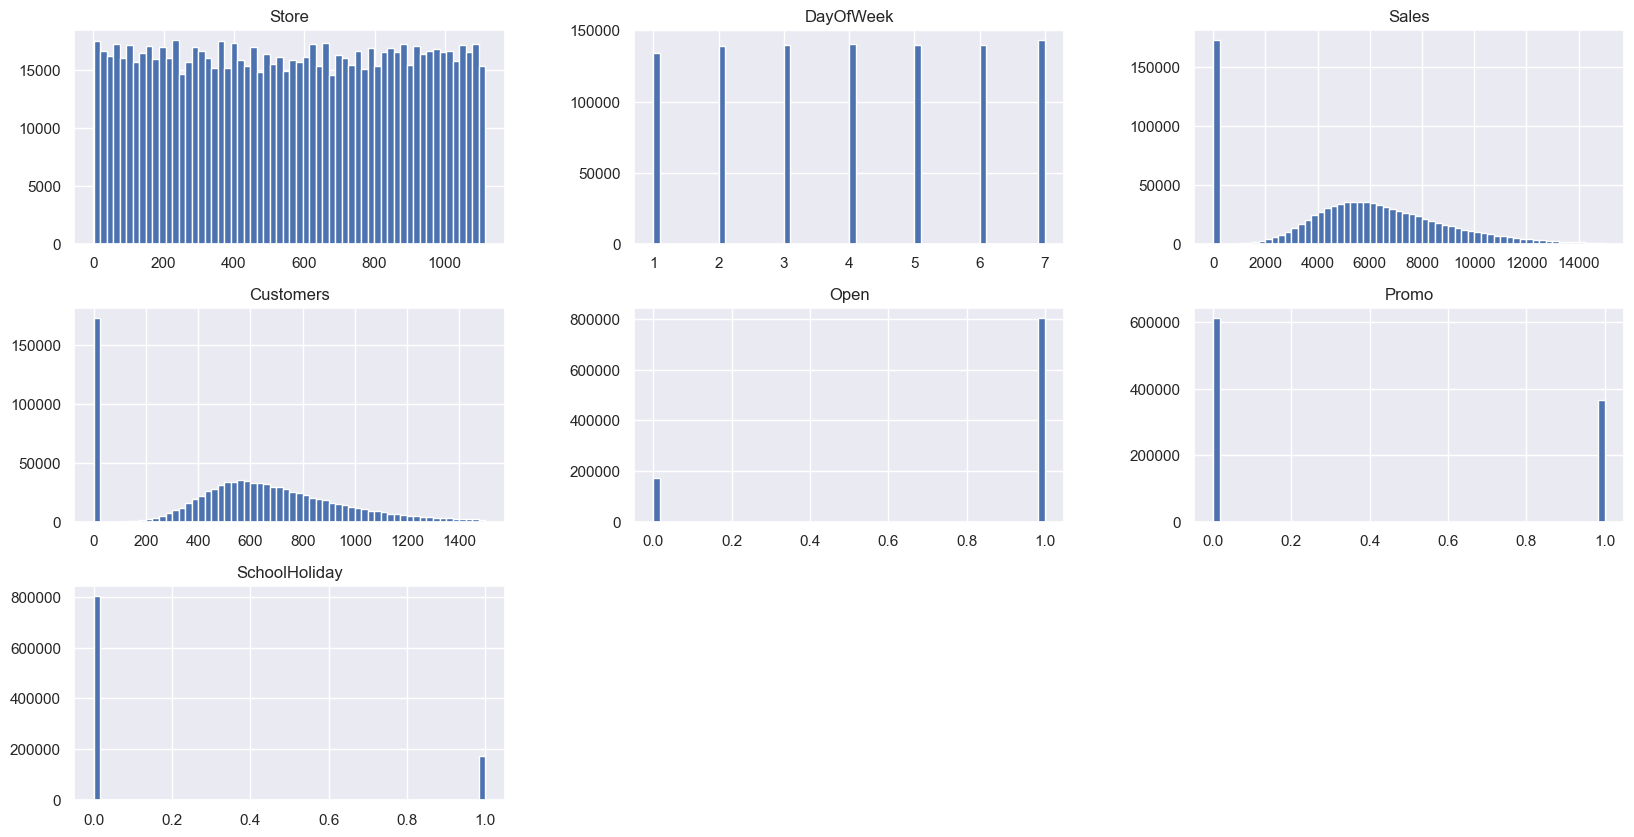

In [71]:
df_sales_clean.hist(figsize=(20, 10), bins = 60)
plt.show()

## 4.2 Stores Data Cleaning <a id ='data_clean2'></a>
[Back to top](#table_of_contents)

In [72]:
df_store_clean = df_store.copy()

### handling missing values

In [73]:
# checking missing values
df_store_clean.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### visual inspection of missing data

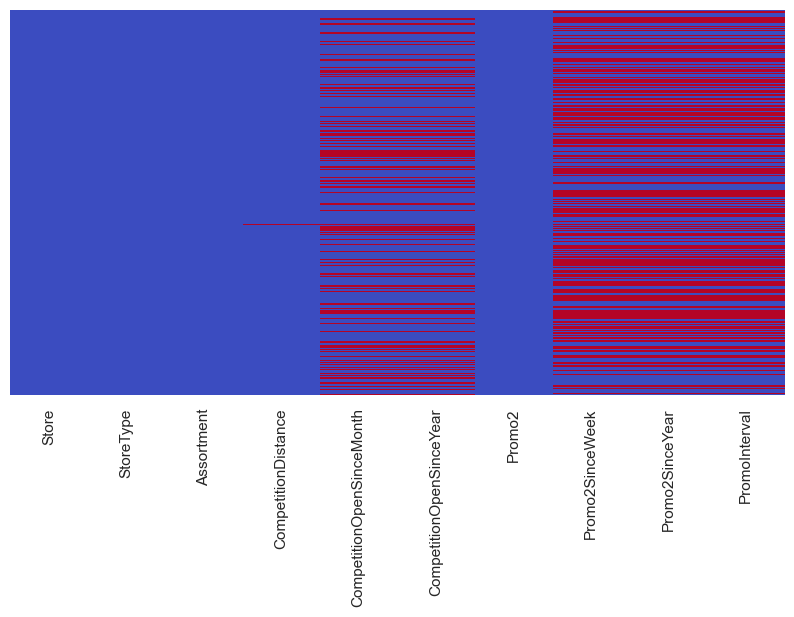

In [74]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_store_clean.isnull(), cbar=False, cmap='coolwarm', yticklabels=False)
plt.show()

In [75]:
#clearning missing data
df_store_clean['CompetitionDistance'].fillna(df_store_clean['CompetitionDistance'].mean(), inplace=True)
df_store_clean['Promo2SinceWeek'].fillna(0, inplace=True)
df_store_clean['Promo2SinceYear'].fillna(0, inplace=True)
df_store_clean['PromoInterval'].fillna('NoPromo', inplace=True)
df_store_clean['CompetitionOpenSinceMonth'].fillna(df_store_clean['CompetitionOpenSinceMonth'].mean(), inplace=True)
df_store_clean['CompetitionOpenSinceYear'].fillna(df_store_clean['CompetitionOpenSinceYear'].median(), inplace=True)

In [76]:
df_store_clean.isna().sum().sum()

0

In [77]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_store_clean.isnull(), cbar=False, cmap='coolwarm', yticklabels=False)
plt.show()

In [78]:
df_store_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [79]:
# changing dtypes to int
df_store_clean['CompetitionOpenSinceMonth'] = df_store_clean['CompetitionOpenSinceMonth'].astype('int')
df_store_clean['CompetitionOpenSinceYear'] = df_store_clean['CompetitionOpenSinceYear'].astype('int')
df_store_clean['Promo2SinceWeek'] = df_store_clean['Promo2SinceWeek'].astype('int')
df_store_clean['Promo2SinceYear'] = df_store_clean['Promo2SinceYear'].astype('int')

# 5. Feature engineering <a id='feature_engineering'></a>
[Back to top](#table_of_contents)

### Sales data feature extraction

#### working with dates

In [80]:
df_sales_new_feat = df_sales_clean.copy()

In [81]:
df_sales_new_feat.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  31-07-2015   5263        555     1      1            0   
1      2          5  31-07-2015   6064        625     1      1            0   
2      3          5  31-07-2015   8314        821     1      1            0   
3      4          5  31-07-2015  13995       1498     1      1            0   
4      5          5  31-07-2015   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [82]:
df_sales_new_feat['Date'] = pd.to_datetime(df_sales_new_feat['Date'])

In [83]:
df_sales_new_feat['Date'].info()

<class 'pandas.core.series.Series'>
Index: 975812 entries, 0 to 1017208
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
975812 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 14.9 MB


In [84]:
# extracting dayoftheweek, weekend, month and year feature 
df_sales_new_feat['date_year'] = df_sales_new_feat['Date'].dt.year
df_sales_new_feat['date_month'] = df_sales_new_feat['Date'].dt.month
df_sales_new_feat['date_dow_name'] = df_sales_new_feat['Date'].dt.day_name()
df_sales_new_feat['date_is_weekend'] = np.where(df_sales_new_feat['date_dow_name'].isin(['Sunday', 'Saturday']), 1, 0)

In [85]:
df_sales_new_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975812 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Store            975812 non-null  int64         
 1   DayOfWeek        975812 non-null  int64         
 2   Date             975812 non-null  datetime64[ns]
 3   Sales            975812 non-null  int64         
 4   Customers        975812 non-null  int64         
 5   Open             975812 non-null  int64         
 6   Promo            975812 non-null  int64         
 7   StateHoliday     975812 non-null  object        
 8   SchoolHoliday    975812 non-null  int64         
 9   date_year        975812 non-null  int32         
 10  date_month       975812 non-null  int32         
 11  date_dow_name    975812 non-null  object        
 12  date_is_weekend  975812 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(7), object(2)
memory usage: 93.1+ MB


In [86]:
df_sales_new_feat.drop(columns=['Date', 'date_dow_name'], axis=1, inplace=True)

In [87]:
df_sales_new_feat.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'date_year', 'date_month',
       'date_is_weekend'],
      dtype='object')

In [88]:
df_sales_new_feat = df_sales_new_feat[['Store', 'DayOfWeek', 'Sales','Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'date_year', 'date_month', 'date_is_weekend']]

In [89]:
df_sales_new_feat.sample(4)

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
732741    972          5   4446        509     1      1            0   
430994    275          2   6199        705     1      0            0   
389785     78          7      0          0     0      0            0   
964099    410          7      0          0     0      0            0   

        SchoolHoliday  date_year  date_month  date_is_weekend  
732741              0       2013           9                0  
430994              1       2014           6                0  
389785              0       2014           7                1  
964099              0       2013           2                1

### Store data feature extraction
[Back to top](#table_of_contents)

In [90]:
df_store_new_feat = df_store_clean.copy()

In [91]:
df_store_new_feat.CompetitionDistance.describe()

count     1115.000000
mean      5404.901079
std       7652.849306
min         20.000000
25%        720.000000
50%       2330.000000
75%       6875.000000
max      75860.000000
Name: CompetitionDistance, dtype: float64

### Adding 'CompetitionDistance_Range' feature using column CompetitionDistance

In [92]:
ranges = [0, 702.5, 2285, 6360, 27650, float('inf')]
label = ['Very Close', 'Close', 'Moderate', 'Far', 'Very Far']

df_store_new_feat['CompetitionDistanceRange'] = pd.cut(df_store_new_feat['CompetitionDistance'],
                                                           bins=ranges,
                                                           labels=label,
                                                           include_lowest=True,
                                                           right=False
                                                       )

In [93]:
df_store_new_feat.CompetitionOpenSinceYear.describe()

count    1115.000000
mean     2009.091480
std         5.155105
min      1900.000000
25%      2008.000000
50%      2010.000000
75%      2011.000000
max      2015.000000
Name: CompetitionOpenSinceYear, dtype: float64

### Creating 'CompetitionOpenSinceYear1' using column CompetitionOpenSinceYear

In [94]:
def competetionOpenSince(year):
    if year < 2000:
        return 'Before 2000'
    elif 2000 <= year <= 2005:
        return '2000-2005'
    elif 2006 <= year <= 2010:
        return '2006-2010'
    elif 2011 <= year <= 2015:
        return '2011-2015'
    else:
        return 'Unknown'
    
df_store_new_feat['CompetitionOpenSinceYear1'] = df_store_new_feat['CompetitionOpenSinceYear'].apply(competetionOpenSince)

In [95]:
df_store_new_feat.CompetitionOpenSinceYear1.value_counts()

CompetitionOpenSinceYear1
2006-2010      612
2011-2015      327
2000-2005      156
Before 2000     20
Name: count, dtype: int64

In [96]:
df_store_new_feat.drop(columns=['CompetitionDistance', 'CompetitionOpenSinceYear'], axis=1, inplace=True)

In [97]:
df_store_new_feat.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionOpenSinceMonth',
       'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionDistanceRange', 'CompetitionOpenSinceYear1'],
      dtype='object')

In [98]:
# Rearranging columns
df_store_new_feat = df_store_new_feat[['Store', 'StoreType', 'Assortment', 'CompetitionDistanceRange',
                                       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear1','Promo2',
                                       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
                                     ]]

In [99]:
df_store_new_feat.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistanceRange        5
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear1       4
Promo2                          2
Promo2SinceWeek                25
Promo2SinceYear                 8
PromoInterval                   4
dtype: int64

In [100]:
df_store_new_feat.sample(4)

Store StoreType Assortment CompetitionDistanceRange  \
136    137         a          a                    Close   
110    111         d          c                      Far   
4        5         a          a                 Very Far   
773    774         a          c               Very Close   

     CompetitionOpenSinceMonth CompetitionOpenSinceYear1  Promo2  \
136                          7                 2011-2015       1   
110                          7                 2006-2010       1   
4                            4                 2011-2015       0   
773                          9                 2011-2015       0   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
136               40             2014  Jan,Apr,Jul,Oct  
110               37             2009  Jan,Apr,Jul,Oct  
4                  0                0          NoPromo  
773                0                0          NoPromo

# 6. Data preparation <a id='data_preparation'></a>
[Back to top](#table_of_contents)

## 6.1 Data merging <a id='data_merge'></a>
[Back to top](#table_of_contents)

In [101]:
# merging sales and stores data

In [102]:
df_merge = pd.merge(df_sales_new_feat, df_store_new_feat, on='Store', how='inner')

In [103]:
df_merge.sample(4)

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
705017    836          6   2335        282     1      0            0   
975429    676          6   3028        862     1      0            0   
620467    736          3      0          0     0      0            c   
939717   1106          4   7009        788     1      1            0   

        SchoolHoliday  date_year  date_month  date_is_weekend StoreType  \
705017              0       2014           2                1         a   
975429              0       2013           1                1         b   
620467              1       2013          12                0         c   
939717              1       2013           3                0         a   

       Assortment CompetitionDistanceRange  CompetitionOpenSinceMonth  \
705017          a                 Moderate                          9   
975429          b                    Close                          9   
620467          c                    Close                          7   
939717          c                 Moderate                          9   

       CompetitionOpenSinceYear1  Promo2  Promo2SinceWeek  Promo2SinceYear  \
705017                 2011-2015       0                0                0   
975429                 2006-2010       0                0                0   
620467                 2006-2010       1               14             2011   
939717                 2011-2015       1               31             2013   

          PromoInterval  
705017          NoPromo  
975429          NoPromo  
620467  Jan,Apr,Jul,Oct  
939717  Jan,Apr,Jul,Oct

In [104]:
df_merge.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'date_year', 'date_month',
       'date_is_weekend', 'StoreType', 'Assortment',
       'CompetitionDistanceRange', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear1', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [105]:
df_merge.isna().sum().sum()

0

In [106]:
df_merge.shape

(975812, 20)

In [107]:
df_merge.duplicated().sum()

107282

#### Droping duplicate values

In [108]:
df_merge = df_merge.drop_duplicates()

In [109]:
df_merge.duplicated().sum()

0

In [110]:
df_merge.shape

(868530, 20)

## 6.2 Encoding Categorical Features <a id='encoding'></a>
[Back to top](#table_of_contents)

In [111]:
df_merge.StateHoliday = df_merge.StateHoliday.map({'0':0, 'a':1,'b':2, 'c':3})
df_merge.Assortment = df_merge.Assortment.map({'a':0, 'c':1, 'b':2})
df_merge.CompetitionDistanceRange = df_merge.CompetitionDistanceRange.map({'Very Close':0, 
                                                                          'Close':1,
                                                                          'Moderate':2,
                                                                          'Far':3,
                                                                          'Very Far':4})

df_merge.CompetitionOpenSinceYear1 = df_merge.CompetitionOpenSinceYear1.map({ 'Before 2000': 0,
                                                                                '2000-2005': 1,
                                                                                '2006-2010': 2,
                                                                                '2011-2015': 3})

df_merge.StoreType = df_merge.StoreType.map({'a':0, 'b':1, 'c':2, 'd':3})

df_merge.PromoInterval = df_merge.PromoInterval.map({'NoPromo':0,
                                                     'Jan,Apr,Jul,Oct':1,
                                                     'Feb,May,Aug,Nov':2,
                                                     'Mar,Jun,Sept,Dec':3})

In [112]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 868530 entries, 0 to 975811
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Store                      868530 non-null  int64   
 1   DayOfWeek                  868530 non-null  int64   
 2   Sales                      868530 non-null  int64   
 3   Customers                  868530 non-null  int64   
 4   Open                       868530 non-null  int64   
 5   Promo                      868530 non-null  int64   
 6   StateHoliday               868530 non-null  int64   
 7   SchoolHoliday              868530 non-null  int64   
 8   date_year                  868530 non-null  int32   
 9   date_month                 868530 non-null  int32   
 10  date_is_weekend            868530 non-null  int32   
 11  StoreType                  868530 non-null  int64   
 12  Assortment                 868530 non-null  int64   
 13  CompetitionDistance

In [113]:
df_merge.CompetitionDistanceRange = df_merge.CompetitionDistanceRange.astype('int32')

In [114]:
df_merge.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'date_year', 'date_month',
       'date_is_weekend', 'StoreType', 'Assortment',
       'CompetitionDistanceRange', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear1', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [115]:
df_merge.sample(4)

Store  DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  \
510312    606          5   6821        671     1      1             0   
264340    303          2   7417        765     1      1             0   
937516   1104          6   5958        498     1      0             0   
121096    138          2   5711        616     1      0             0   

        SchoolHoliday  date_year  date_month  date_is_weekend  StoreType  \
510312              0       2015           5                0          0   
264340              0       2014          11                0          0   
937516              0       2014           2                1          3   
121096              0       2014           1                0          0   

        Assortment  CompetitionDistanceRange  CompetitionOpenSinceMonth  \
510312           0                         1                         11   
264340           0                         3                         11   
937516           0                         0                          2   
121096           1                         3                         10   

        CompetitionOpenSinceYear1  Promo2  Promo2SinceWeek  Promo2SinceYear  \
510312                          2       0                0                0   
264340                          3       1               18             2011   
937516                          3       1               14             2011   
121096                          3       0                0                0   

        PromoInterval  
510312              0  
264340              2  
937516              1  
121096              0

## 6.3 Data Splitting <a id='split'></a>
[Back to top](#table_of_contents)

### split dependent and independent features

In [116]:
data_for_model = df_merge.copy()

In [117]:
data_for_model.shape

(868530, 20)

In [118]:
input_features = ['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'date_year', 'date_month',
       'date_is_weekend', 'StoreType', 'Assortment',
       'CompetitionDistanceRange', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear1', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']
target_feature = ['Sales']

In [119]:
X = data_for_model[input_features]
Y = data_for_model[target_feature]

In [120]:
from sklearn.model_selection import train_test_split

# Split the data into train+validation and test sets (80% train+validation, 20% test)
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Further split the train+validation set into train and validation sets (75% train, 25% validation of the train+validation set)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Reset indices
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
Y_val = Y_val.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

## 6.4 Feature Selection <a id='feature_select'></a>
[Back to top](#table_of_contents)

### Feature selection by identifying correlation between independent features

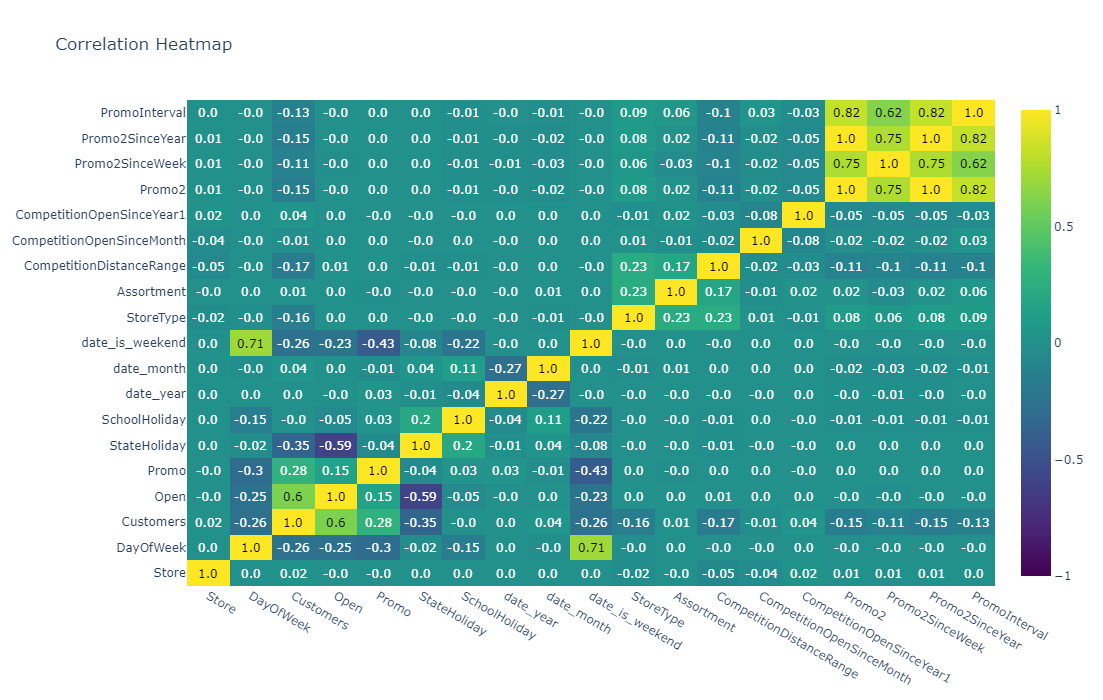

In [121]:
import plotly.graph_objects as go

corr_matrix = X_train.corr()

# Create a heatmap
fig = go.Figure(data=go.Heatmap(
                   x=corr_matrix.columns,
                   y=corr_matrix.columns,
                   z=corr_matrix.values,
                   colorscale='Viridis',
                   zmin=-1, zmax=1))

# Add annotations to display correlations values in each squares
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        fig.add_annotation(
            x=corr_matrix.columns[j],
            y=corr_matrix.columns[i],
            text=str(round(corr_matrix.iloc[i, j], 2)),
            showarrow=False,
            font=dict(color='white' if corr_matrix.iloc[i, j] < 0.5 else 'black')
        )

# Add title and labels
fig.update_layout(
    title='Correlation Heatmap',
    xaxis_nticks=36,
    width=1000, 
    height=700 
)

# Show the plot
fig.show()

### dropping approapriate features with high correlation

In [122]:
X_train.drop(columns=['DayOfWeek', 'Promo2SinceYear', 'PromoInterval'],
             axis=1, inplace=True)

In [123]:
X_val.drop(columns=['DayOfWeek', 'Promo2SinceYear', 'PromoInterval'],
           axis=1, inplace=True)

In [124]:
X_test.drop(columns=['DayOfWeek', 'Promo2SinceYear', 'PromoInterval'],
            axis=1, inplace=True)

In [125]:
X_train.shape

(521118, 16)

In [126]:
X_val.shape

(173706, 16)

In [127]:
X_test.shape

(173706, 16)

# 7. Model training <a id='model_training'></a>
[Back to top](#table_of_contents)